# Titanic Survival Analysis 🚢

This notebook explores the Titanic dataset to analyze which factors influenced passenger survival.  

---


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_theme(style="whitegrid", context="notebook")

# Create images folder if not exists
os.makedirs("images", exist_ok=True)

def save_show_plot(fig, filename):
    """Save plot to images/ and display it"""
    filepath = os.path.join("images", filename)
    fig.savefig(filepath, bbox_inches="tight", dpi=300)
    plt.show()


## 📂 Load and Inspect the Data


In [ ]:
CSV_PATH = 'data/titanic.csv'
df = pd.read_csv(CSV_PATH)
df = df.drop('Cabin', axis=1)

# Check missing values
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

## 🛠 Data Cleaning
- Fill missing `Embarked` values using the most common port for respectable class passengers.
- Fill missing `Age` values with the median of passengers grouped by class and sex.


In [10]:
count_by_embarked_letter = df[df['Pclass'] == 1].groupby('Embarked').count()['PassengerId']
df['Embarked'] = df['Embarked'].fillna(count_by_embarked_letter.idxmax())

df['Age'] = df.groupby(['Pclass','Sex'])['Age'].transform(lambda x: x.fillna(x.median()))


## ➕ Feature Engineering
- Create `AgeGroup` bins
- Create `FamilySize` and `IsAlone` features


In [11]:
bins = [0, 12, 19, 35, 55, 100]
labels = ['Child', 'Teen', 'Adult', 'MiddleAge', 'Elder']
df['AgeGroup'] = pd.cut(df['Age'], bins, labels=labels)

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)


## Survival by Sex


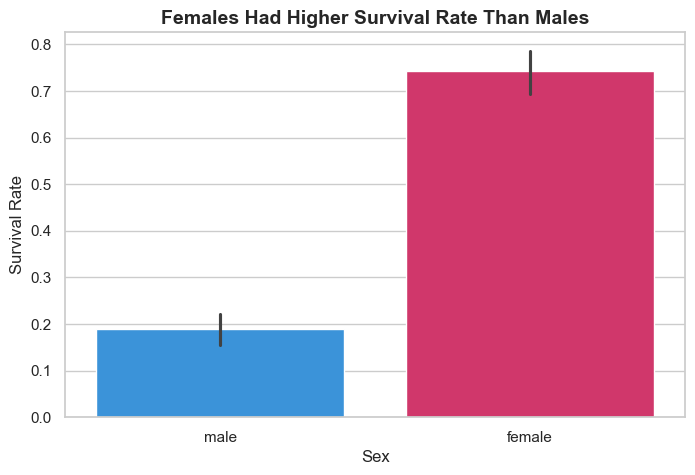

In [12]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(
    x='Sex', y='Survived',
    hue='Sex', data=df,
    palette={"male":"#2196F3", "female":"#E91E63"},
    legend=False, ax=ax
)
plt.title('Females Had Higher Survival Rate Than Males', fontsize=14, fontweight='bold')
plt.ylabel("Survival Rate")

save_show_plot(fig, "survival_by_sex.png")


## Did Traveling Alone Affect Survival?

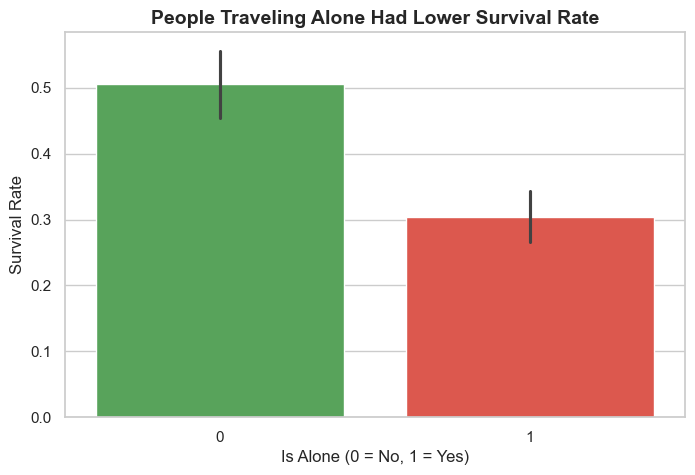

In [13]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(
    x='IsAlone', y='Survived',
    hue='IsAlone', data=df,
    palette={0:"#4CAF50", 1:"#F44336"},
    legend=False, ax=ax
)
plt.title('People Traveling Alone Had Lower Survival Rate', fontsize=14, fontweight='bold')
plt.xlabel("Is Alone (0 = No, 1 = Yes)")
plt.ylabel("Survival Rate")
plt.show()

save_show_plot(fig, "survival_by_alone.png")

## Survival by class

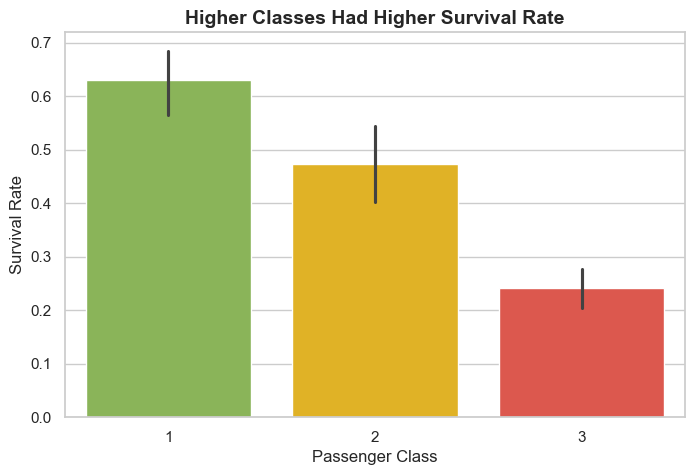

In [14]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(
    x='Pclass', y='Survived',
    hue='Pclass', data=df,
    palette={1:"#8BC34A", 2:"#FFC107", 3:"#F44336"},
    legend=False, ax=ax
)
plt.title('Higher Classes Had Higher Survival Rate', fontsize=14, fontweight='bold')
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

save_show_plot(fig, "survival_by_class.png")

## Age Distribution by Survival Status

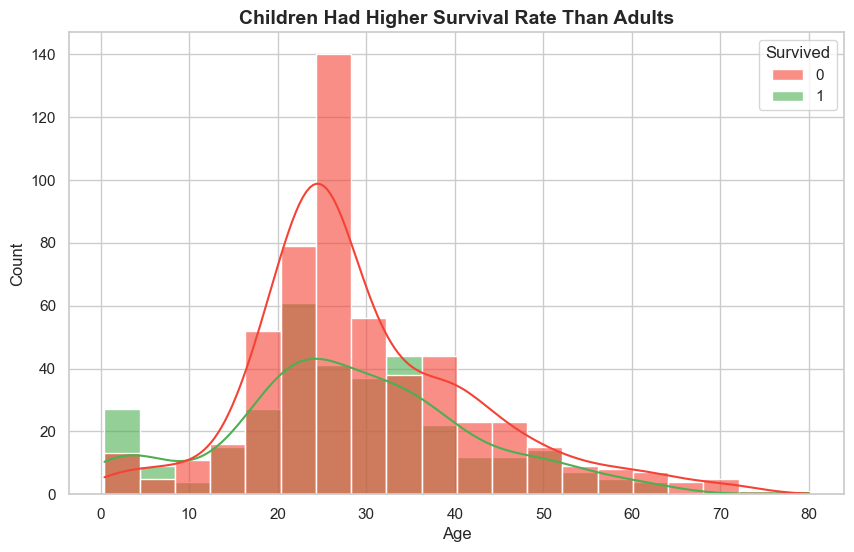

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(
    data=df, x='Age', hue='Survived',
    bins=20, kde=True, alpha=0.6,
    palette={0:"#F44336", 1:"#4CAF50"}
)
plt.title('Children Had Higher Survival Rate Than Adults', fontsize=14, fontweight='bold')
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

## Survival by Fare

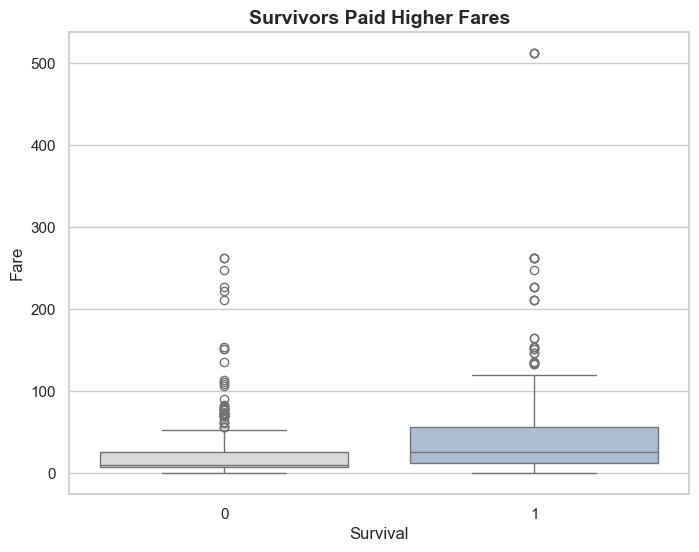

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(
    x='Survived', y='Fare',
    hue='Survived', data=df,
    palette={0:"#d9d9d9", 1:"#a6bddb"},
    dodge=False, legend=False, ax=ax
)
plt.title('Survivors Paid Higher Fares', fontsize=14, fontweight='bold')
plt.xlabel("Survival")
plt.ylabel("Fare")
plt.show()

save_show_plot(fig, "fare_boxplot.png")

## Correlation Heatmap

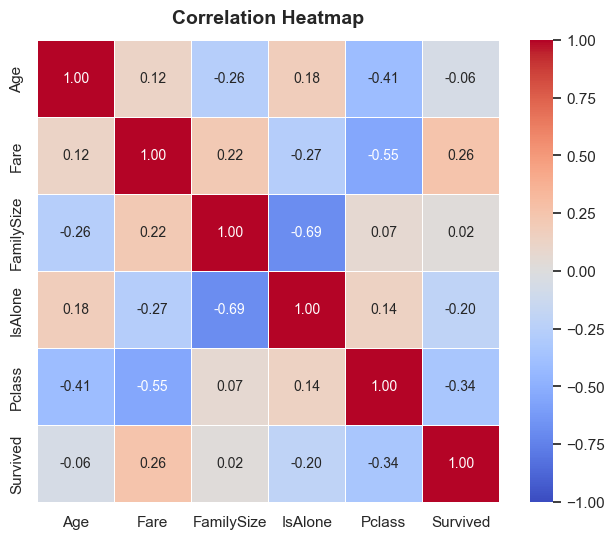

In [17]:
# Compute correlation
corr = df[['Age','Fare','FamilySize','IsAlone','Pclass','Survived']].corr()

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(
    corr, annot=True, fmt=".2f",
    cmap="coolwarm", center=0, cbar=True,
    linewidths=0.5, linecolor='white',
    square=True, annot_kws={"size":10},
    vmin=-1, vmax=1
)
plt.title("Correlation Heatmap", fontsize=14, fontweight="bold", pad=12)
plt.show()

save_show_plot(fig, "correlation_heatmap.png")


## ✅ Conclusions

- Women and children had higher survival rates.
- First-class passengers were more likely to survive.
- Traveling alone reduced survival chances.
- Higher fares correlated with higher survival probability.

---

**Nika Losaberidze**
